In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6)

In [5]:
# Convert the June temperatures to a list.
june_results = []
june_results = june_temps

In [6]:
# Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date','temperature (observed)'])
june_df.set_index(june_df['temperature (observed)'], inplace=True)

In [7]:
# Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature (observed)
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


array([[<AxesSubplot:title={'center':'temperature (observed)'}>]],
      dtype=object)

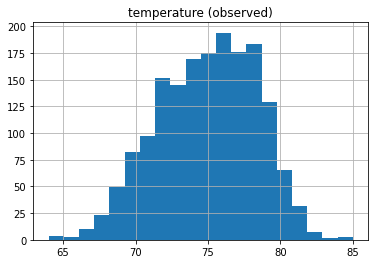

In [29]:
june_df.hist(bins=20)

## D2: Determine the Summary Statistics for December

In [8]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [9]:
# Convert the December temperatures to a list.
dec_results = []
dec_results = dec_temps

In [10]:
# Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date','temperature (observed)'])
dec_df.set_index(dec_df['temperature (observed)'], inplace=True)

In [11]:
# Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temperature (observed)
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


array([[<AxesSubplot:title={'center':'temperature (observed)'}>]],
      dtype=object)

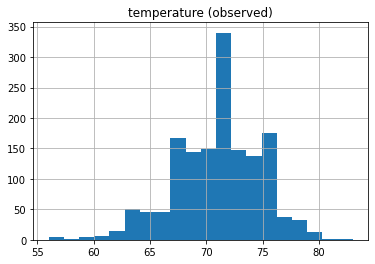

In [28]:
dec_df.hist(bins=20)